#### COVID-19 Vaccination

Import Statements for data analysis using pandas, data manipulation using numpy and plotting the visualizations such as choropleth map, line plots, horizontal barplots using plotly, matplotlib and seaborn.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_theme(style="darkgrid")
import matplotlib.pyplot as plt
from pandas.plotting import radviz
import plotly.express as plotlybar
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import warnings
warnings.filterwarnings('ignore')

#Imports for plotting
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
import seaborn as sns
from matplotlib.colors import ListedColormap
%matplotlib inline

#Import for mixed data
from prince import FAMD
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from kmodes.kprototypes import KPrototypes
from sklearn.preprocessing import StandardScaler
random_state = 1234
pd.options.plotting.backend = "plotly"

#### Reading the Dataset on COVID-19 (coronavirus) vaccinations
##### country_vaccinations_df:</br> 
Dataframe Names: cv_df, country_vaccinations_df</br> 

Country-by-country data on global COVID-19 vaccinations.</br>
This dataset includes international aggregates (World, continents, European Union…). They can be identified by their iso_code. This dataset consists of the following columns:</br>
<ul>
    <li>country: name of the country (or region within a country).</li>
    <li>iso_code: ISO 3166-1 alpha-3 – three-letter country codes.</li>
    <li>date: date of the observation.</li>
    <li>total_vaccinations: total number of doses administered and so on.</li>
</ul>


##### country_vaccinations_by_manufacturer_df:</br>
Dataframe Names: cvm_df, country_vaccinations_by_manufacturer_df</br>

This dataset includes European and American locations. They can be identified by their location.</br>
<ul>
    <li>location: name of the country (or region within a country).</li>
    <li>date: date of the observation.</li>
    <li>vaccine: list of vaccines administered in the location.</li>
    <li>total_vaccinations: total number of doses administered.</li>
</ul>

In [2]:
country_vaccinations_df=pd.read_csv('2021-05-19_country_vaccinations.csv')
country_vaccinations_by_manufacturer_df=pd.read_csv('2021-05-19_country_vaccinations_by_manufacturer.csv')
cv_df=country_vaccinations_df
cvm_df=country_vaccinations_by_manufacturer_df

In [3]:
country_vaccinations_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17607 entries, 0 to 17606
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              17607 non-null  object 
 1   iso_code                             17607 non-null  object 
 2   date                                 17607 non-null  object 
 3   total_vaccinations                   10251 non-null  float64
 4   people_vaccinated                    9526 non-null   float64
 5   people_fully_vaccinated              7185 non-null   float64
 6   daily_vaccinations_raw               8568 non-null   float64
 7   daily_vaccinations                   17391 non-null  float64
 8   total_vaccinations_per_hundred       10251 non-null  float64
 9   people_vaccinated_per_hundred        9526 non-null   float64
 10  people_fully_vaccinated_per_hundred  7185 non-null   float64
 11  daily_vaccinations_per_milli

In [4]:
country_vaccinations_by_manufacturer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3808 entries, 0 to 3807
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   location            3808 non-null   object
 1   date                3808 non-null   object
 2   vaccine             3808 non-null   object
 3   total_vaccinations  3808 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 119.1+ KB


#### Changing the 'date' column into a proper datetime format.   

In [5]:
cv_df['date']=pd.to_datetime(cv_df['date'],format='%Y-%m-%d')
cvm_df['date']=pd.to_datetime(cvm_df['date'],format='%Y-%m-%d')

In [6]:
cv_df

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17602,Zimbabwe,ZWE,2021-05-08,657838.0,509274.0,148564.0,17076.0,19648.0,4.43,3.43,1.00,1322.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1392575941...
17603,Zimbabwe,ZWE,2021-05-09,684243.0,526066.0,158177.0,26405.0,22863.0,4.60,3.54,1.06,1538.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1392575941...
17604,Zimbabwe,ZWE,2021-05-10,690653.0,529360.0,161293.0,6410.0,21877.0,4.65,3.56,1.09,1472.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1392575941...
17605,Zimbabwe,ZWE,2021-05-11,709772.0,539526.0,170246.0,19119.0,21428.0,4.78,3.63,1.15,1442.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1392575941...


In [7]:
cvm_df

,location,date,vaccine,total_vaccinations
0,Chile,2020-12-24,Pfizer/BioNTech,420
1,Chile,2020-12-25,Pfizer/BioNTech,5198
2,Chile,2020-12-26,Pfizer/BioNTech,8338
3,Chile,2020-12-27,Pfizer/BioNTech,8649
4,Chile,2020-12-28,Pfizer/BioNTech,8649
...,...,...,...,...
3803,United States,2021-05-12,Moderna,113582961
3804,United States,2021-05-12,Pfizer/BioNTech,141636737
3805,United States,2021-05-13,Johnson&Johnson,9352742
3806,United States,2021-05-13,Moderna,114354242


#### cv_df_grp dataframe groups based on each country with it's maximum value in each column.

In [8]:
cv_df_grp = cv_df.groupby('country').max().reset_index()
cv_df_grp

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-05-11,504502.0,448878.0,55624.0,NaN,13921.0,1.30,1.15,0.14,358.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/
1,Albania,ALB,2021-05-12,632676.0,444755.0,187921.0,23655.0,17565.0,21.98,15.45,6.53,6104.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, ...",Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
2,Algeria,DZA,2021-02-19,75000.0,NaN,NaN,30.0,3748.0,0.17,NaN,NaN,85.0,Sputnik V,Ministry of Health,https://www.echoroukonline.com/%d9%84%d9%82%d8...
3,Andorra,AND,2021-05-10,31633.0,26931.0,4702.0,2829.0,1182.0,40.94,34.86,6.09,15298.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of Andorra,https://www.govern.ad/covid19_newsletter/
4,Angola,AGO,2021-05-12,626572.0,586377.0,40195.0,NaN,18751.0,1.91,1.78,0.12,571.0,Oxford/AstraZeneca,World Health Organization,https://covid19.who.int/
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206,Wales,OWID_WLS,2021-05-12,2853576.0,1975820.0,877756.0,40211.0,33151.0,90.51,62.67,27.84,10515.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
207,Wallis and Futuna,WLF,2021-05-11,5774.0,4286.0,1488.0,NaN,272.0,51.34,38.11,13.23,24186.0,Oxford/AstraZeneca,SPC Public Health Division,https://stats.pacificdata.org/vis?tm=covid&pg=...
208,Yemen,YEM,2021-05-09,18555.0,18555.0,NaN,NaN,NaN,0.06,0.06,NaN,NaN,Oxford/AstraZeneca,World Health Organization,https://covid19.who.int/
209,Zambia,ZMB,2021-05-12,90916.0,90916.0,NaN,7198.0,5680.0,0.49,0.49,NaN,309.0,Oxford/AstraZeneca,Government of Zambia,https://www.facebook.com/mohzambia/photos/a.77...


#### Total COVID-19 Vaccinations Country-by-Country</br>

The Choropleth Map below shows the countries with total vaccinations. The countries that are purple are less vaccinated compared to the countries which are yellow/ brown. We find that China, India and United States some of the countries that has made the best vaccination progress. 

In [9]:
figure = px.choropleth(cv_df_grp,
                       locations='iso_code', 
                       color='total_vaccinations', 
                       hover_name='country', 
                       color_continuous_scale=px.colors.sequential.Plasma, 
                       title='Total COVID-19 Vaccinations')
iplot(figure)

#### People Vaccinated by COVID-19 Vaccine Country-by-Country</br>

The Choropleth Map below shows the countries that the total number of people who received at least one vaccine dose. If a person receives the first dose of a 2-dose vaccine, this metric goes up by 1. The countries that are dark blue/sky blue are less vaccinated compared to the countries which are dark red/brown. We find that India and United States some of the countries that has made the best vaccination progress.

In [10]:
figure = px.choropleth(cv_df_grp,
                       locations='iso_code', 
                       color='people_vaccinated', 
                       hover_name='country', 
                       color_continuous_scale=px.colors.sequential.Turbo, 
                       title='People Vaccinated by COVID-19 Vaccine')
iplot(figure)

#### People Fully vaccinated by COVID-19 Vaccine Country-by-Country</br>

The Choropleth Map below shows the countries with total number of people who received all doses prescribed by the vaccination protocol. If a person receives the first dose of a 2-dose vaccine, this metric stays the same. If they receive the second dose, the metric goes up by 1. The countries like "India" is moderately vaccinated and "United States" made the best progress in vaccination. The white regions represent countries that does not have sufficient data. 


In [11]:
figure = px.choropleth(cv_df_grp,
                       locations='iso_code', 
                       color='people_fully_vaccinated', 
                       hover_name='country', 
                       color_continuous_scale=px.colors.sequential.Turbo, 
                       title='Total COVID-19 Vaccinations')
iplot(figure)

#### Top 10 Countries with highest total vaccinations 

The horizontal barplot shows the top 10 countries that made best progress in terms of total number of vaccinations.
The countries are grouped based on the maximum cumulative value of each column value. The countries such as 'China', 'United States', 'India','UK' are the top countries that made the best progress. 

In [12]:
cv_df_grp

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-05-11,504502.0,448878.0,55624.0,NaN,13921.0,1.30,1.15,0.14,358.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/
1,Albania,ALB,2021-05-12,632676.0,444755.0,187921.0,23655.0,17565.0,21.98,15.45,6.53,6104.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, ...",Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
2,Algeria,DZA,2021-02-19,75000.0,NaN,NaN,30.0,3748.0,0.17,NaN,NaN,85.0,Sputnik V,Ministry of Health,https://www.echoroukonline.com/%d9%84%d9%82%d8...
3,Andorra,AND,2021-05-10,31633.0,26931.0,4702.0,2829.0,1182.0,40.94,34.86,6.09,15298.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of Andorra,https://www.govern.ad/covid19_newsletter/
4,Angola,AGO,2021-05-12,626572.0,586377.0,40195.0,NaN,18751.0,1.91,1.78,0.12,571.0,Oxford/AstraZeneca,World Health Organization,https://covid19.who.int/
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206,Wales,OWID_WLS,2021-05-12,2853576.0,1975820.0,877756.0,40211.0,33151.0,90.51,62.67,27.84,10515.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
207,Wallis and Futuna,WLF,2021-05-11,5774.0,4286.0,1488.0,NaN,272.0,51.34,38.11,13.23,24186.0,Oxford/AstraZeneca,SPC Public Health Division,https://stats.pacificdata.org/vis?tm=covid&pg=...
208,Yemen,YEM,2021-05-09,18555.0,18555.0,NaN,NaN,NaN,0.06,0.06,NaN,NaN,Oxford/AstraZeneca,World Health Organization,https://covid19.who.int/
209,Zambia,ZMB,2021-05-12,90916.0,90916.0,NaN,7198.0,5680.0,0.49,0.49,NaN,309.0,Oxford/AstraZeneca,Government of Zambia,https://www.facebook.com/mohzambia/photos/a.77...


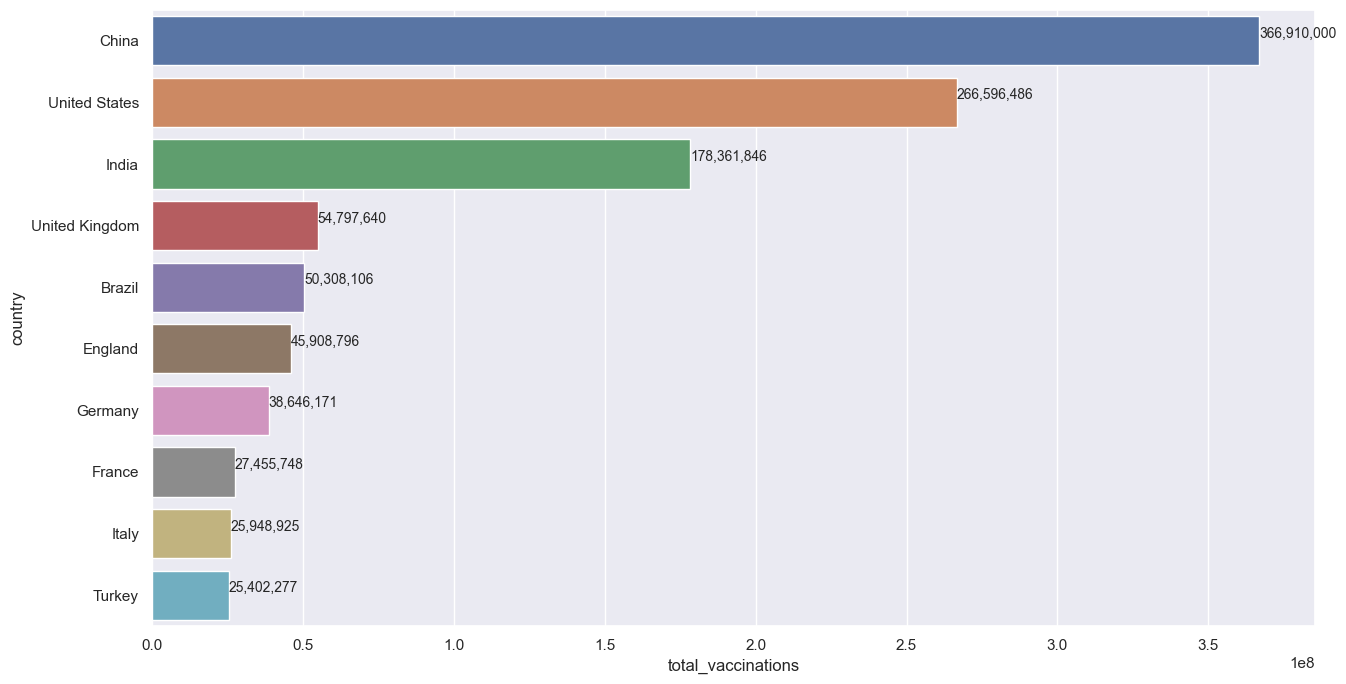

In [13]:
top_10 = cv_df_grp.sort_values(by=['total_vaccinations'],ascending=False).head(10)
#sns.set(font_scale=2)
plt.figure(figsize=(15,8))
x=top_10['total_vaccinations']
y=top_10['country']
plot = sns.barplot(x,y)
for i,(value,name) in enumerate(zip(x,y)):
    plot.text(value,i-0.05,f'{value:,.0f}',size=10)
plt.show()

#### Top 10 Countries with highest number of people vaccinated with atleast 1 dose

The horizontal barplot shows the top 10 countries that made best progress in terms of the total number of people who received at least one vaccine dose.
The countries are grouped based on the maximum cumulative value of each column value. The countries such as 'United States', 'India','UK' are the top countries that made the best progress. There's insufficient data for 'China' but it's among the top countries in terms of vaccinations. 

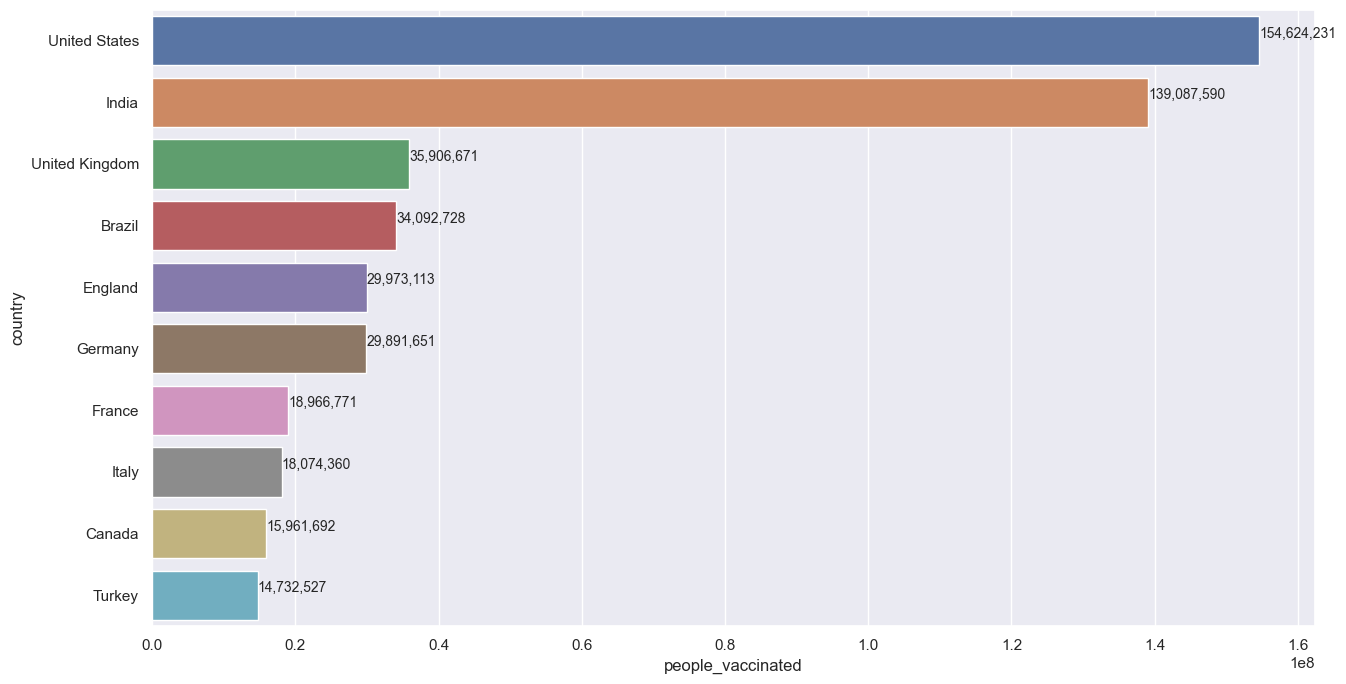

In [14]:
top_10 = cv_df_grp.sort_values(by=['people_vaccinated'],ascending=False).head(10)
plt.figure(figsize=(15,8))
x=top_10['people_vaccinated']
y=top_10['country']
plot = sns.barplot(x,y)
for i,(value,name) in enumerate(zip(x,y)):
    plot.text(value,i-0.05,f'{value:,.0f}',size=10)
plt.show()

#### Top 10 Countries with highest number of people fully vaccinated

The horizontal barplot shows the top 10 countries that made best progress in terms of the total number of people who are fully vaccinated.
The countries are grouped based on the maximum cumulative value of each column value. The countries such as 'United States', 'India','UK' are the top countries that made the best progress. There's insufficient data for 'China' but it's among the top countries in terms of vaccinations. 

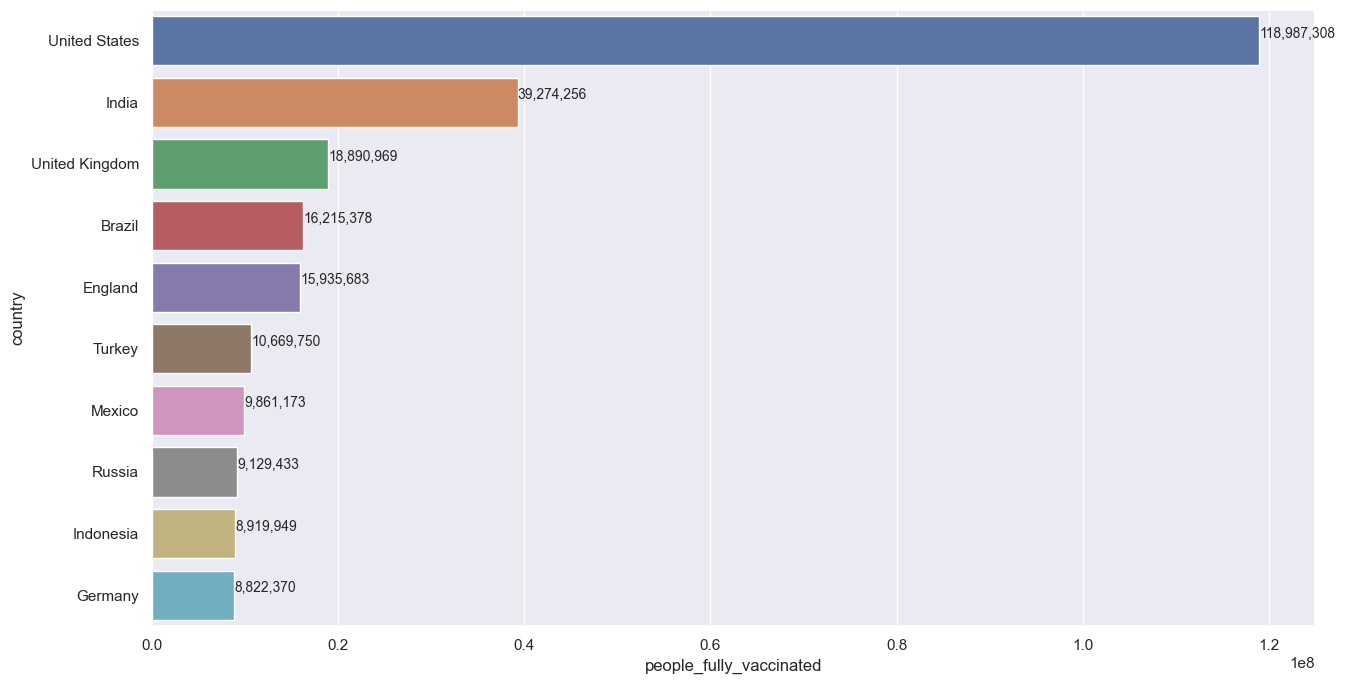

In [15]:
top_10 = cv_df_grp.sort_values(by=['people_fully_vaccinated'],ascending=False).head(10)
plt.figure(figsize=(15,8))
x=top_10['people_fully_vaccinated']
y=top_10['country']
plot = sns.barplot(x,y)
for i,(value,name) in enumerate(zip(x,y)):
    plot.text(value,i-0.05,f'{value:,.0f}',size=10)
plt.show()

#### Top 5 Countries with highest number of  vaccinated with atleast 1 dose versus people fully vaccinated

The horizontal barplot shows the top 5 countries that made best progress in terms of the total number of people who received at least one vaccine dose versus the total number of people who are fully vaccinated.
The countries such as 'United States', 'India','UK' are the top countries that made the best progress and this confirms the similar trend from the previous visualizations. There's insufficient data for 'China' but it's among the top countries in terms of vaccinations. 

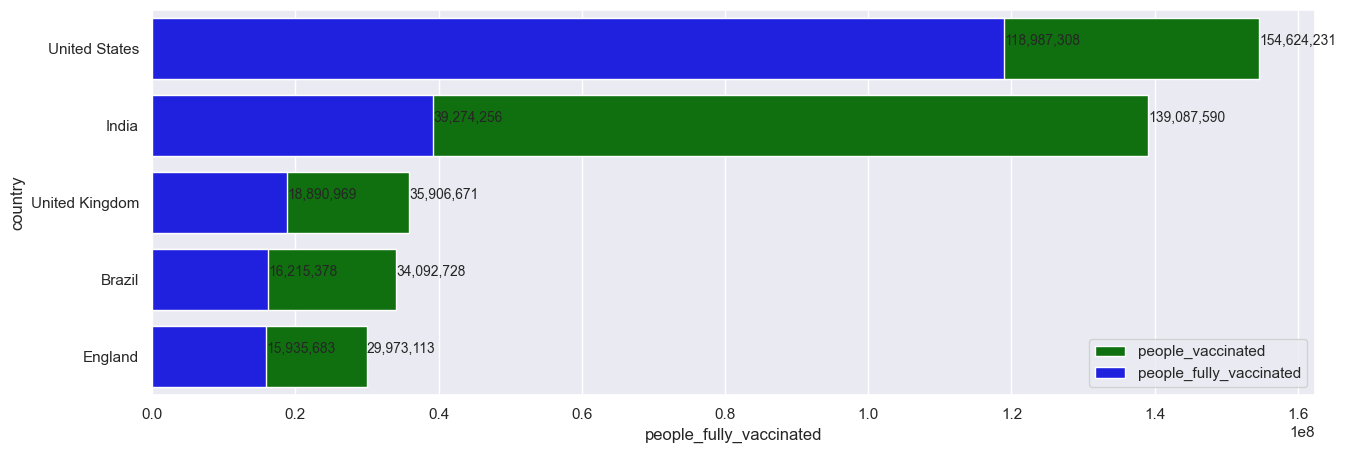

In [16]:
top_5 = cv_df_grp.sort_values(by=['people_vaccinated'], ascending=False).head(5)

### Generate a Barplot
plt.figure(figsize=(15,5))
people_vaccinated = sns.barplot(top_5['people_vaccinated'], top_5['country'], color = 'green', label='people_vaccinated')
people_fully_vaccinated = sns.barplot(top_5['people_fully_vaccinated'], top_5['country'], color = 'blue', label='people_fully_vaccinated')
### Add Texts for Barplots
for i,(value,name) in enumerate(zip(top_5['people_fully_vaccinated'],top_5['country'])):
    people_vaccinated.text(value,i-0.05,f'{value:,.0f}',size=10)
for i,(value,name) in enumerate(zip(top_5['people_vaccinated'],top_5['country'])):
    people_fully_vaccinated.text(value,i-0.05,f'{value:,.0f}',size=10)
plt.legend(loc=4)
plt.show()

#### Relational line plot of top 10 Countries with highest number of total vaccinations

The relational line plot shows the top 10 countries that made best progress in terms of total vaccinations(cumulative). The countries such as 'China','United States', 'India','UK' are the top countries that made the best progress.

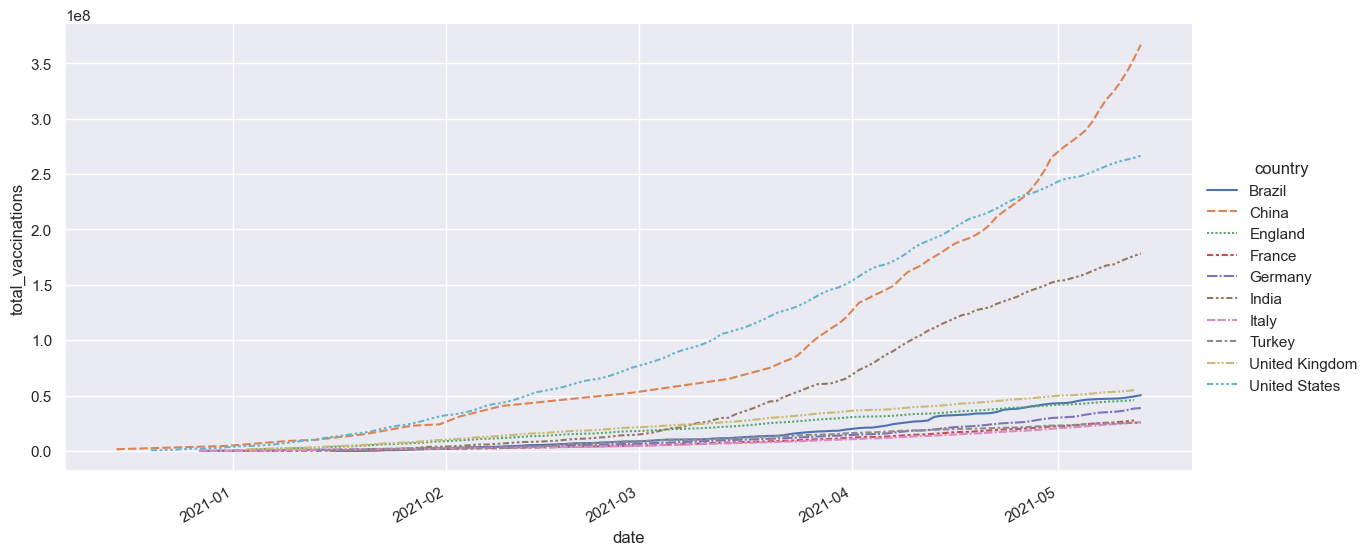

In [17]:
top_10 = cv_df_grp.sort_values(by=['total_vaccinations'],ascending=False).head(10)
top_country_grp = cv_df[cv_df['country'].isin(top_10['country'])]
top_country_pt = top_country_grp.pivot_table(index=['country','date'],values=['total_vaccinations'],aggfunc=np.sum).reset_index()
sns.relplot(x="date", y="total_vaccinations", hue='country', style='country', kind="line", height=6,aspect=2, data=top_country_grp).fig.autofmt_xdate()

#### Relational line plot of top 10 Countries with highest number of total vaccinations per hundred

The relational line plot shows the top 10 countries that made best progress in terms of total vaccinations per hundred(cumulative). The countries such as 'United States','UK' are the top countries that made the best progress.

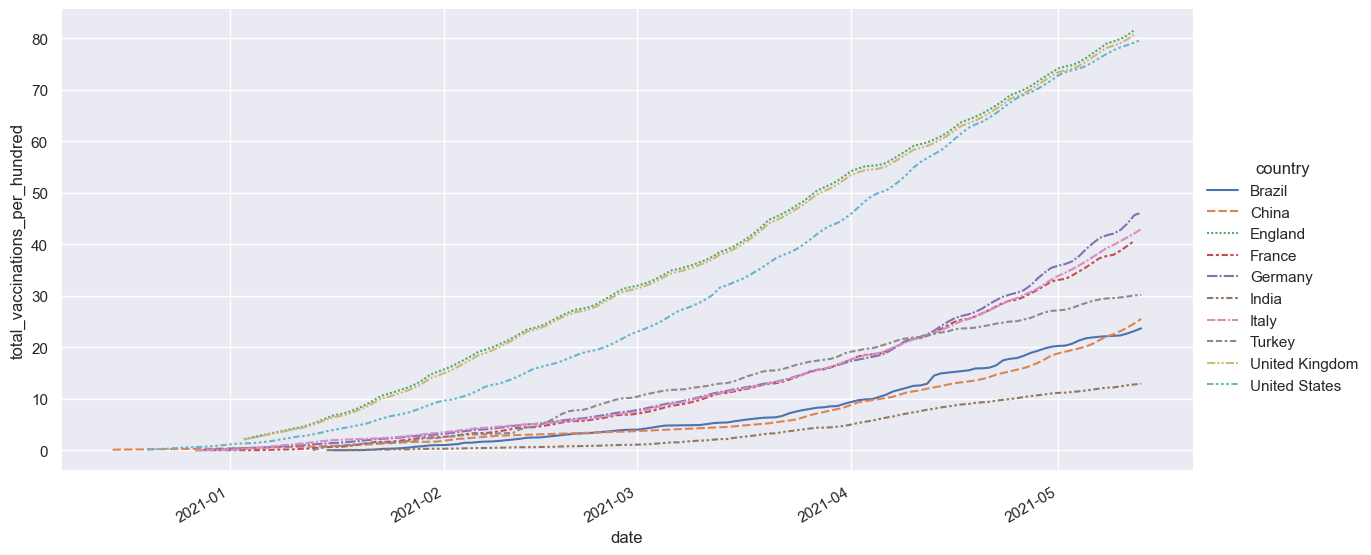

In [18]:
top_10 = cv_df_grp.sort_values(by=['total_vaccinations'],ascending=False).head(10)
top_country_grp = cv_df[cv_df['country'].isin(top_10['country'])]
top_country_pt = top_country_grp.pivot_table(index=['country','date'],values=['total_vaccinations_per_hundred'],aggfunc=np.sum).reset_index()
sns.relplot(x="date", y="total_vaccinations_per_hundred", hue='country', style='country', kind="line", height=6,aspect=2, data=top_country_grp).fig.autofmt_xdate()

#### Relational line plot of top 10 Countries with highest number of total vaccinations per hundred

The relational line plot shows the top 10 countries that made best progress in terms of total vaccinations per hundred(cumulative). The countries such as 'United States','UK' are the top countries that made the best progress.

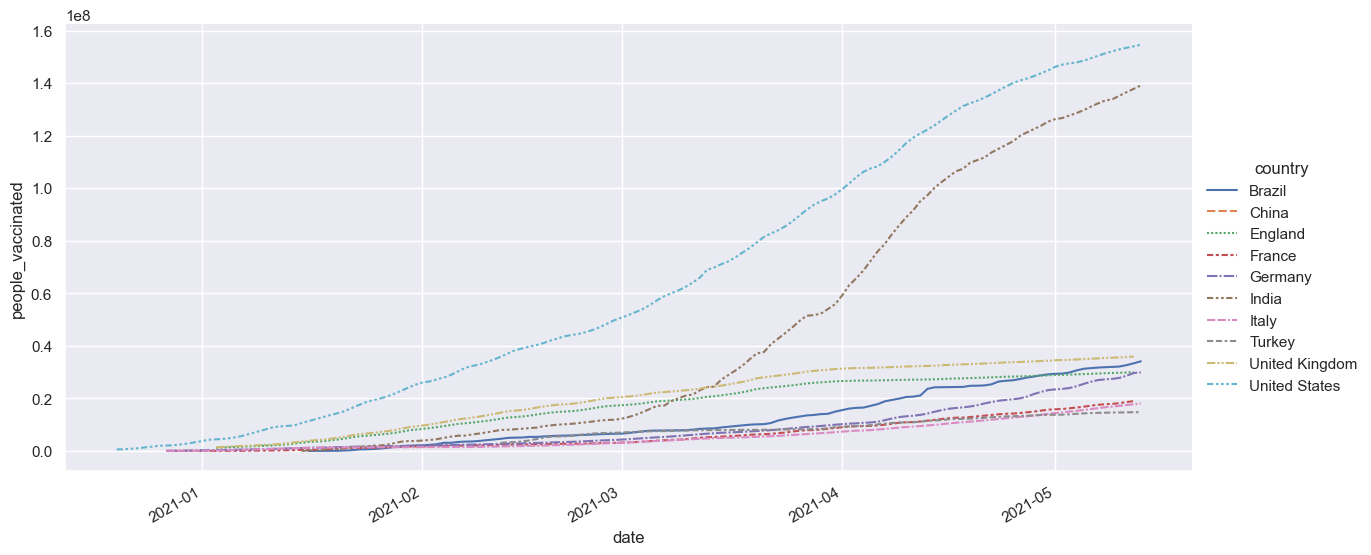

In [19]:
top_10 = cv_df_grp.sort_values(by=['total_vaccinations'],ascending=False).head(10)
top_country_grp = cv_df[cv_df['country'].isin(top_10['country'])]
top_country_pt = top_country_grp.pivot_table(index=['country','date'],values=['people_vaccinated'],aggfunc=np.sum).reset_index()
sns.relplot(x="date", y="people_vaccinated", hue='country', style='country', kind="line", height=6,aspect=2, data=top_country_grp).fig.autofmt_xdate()

#### Relational line plot of top 10 Countries with highest number of daily vaccinations

The relational line plot shows the top 10 countries that made best progress in terms of daily vaccinations new doses administered per day (7-day smoothed). The countries such as 'China','United States', 'India','UK' are the top countries that made the best progress.

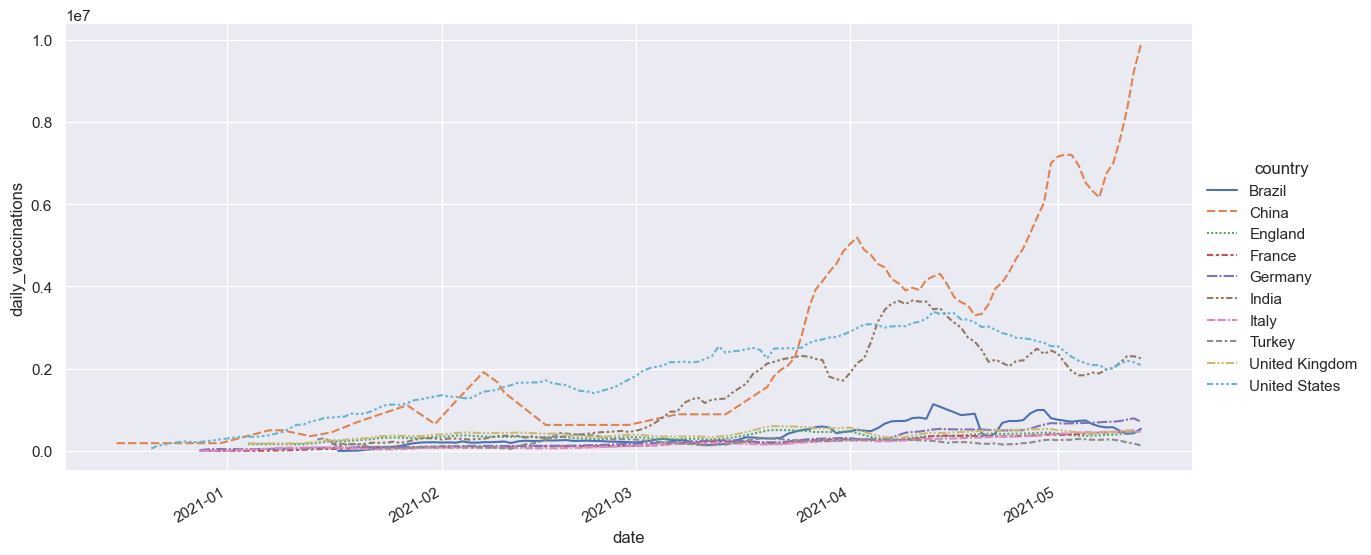

In [20]:
top_10 = cv_df_grp.sort_values(by=['total_vaccinations'],ascending=False).head(10)
top_country_grp = cv_df[cv_df['country'].isin(top_10['country'])]
top_country_pt = top_country_grp.pivot_table(index=['country','date'],values=['daily_vaccinations'],aggfunc=np.sum).reset_index()
sns.relplot(x="date", y="daily_vaccinations", hue='country', style='country', kind="line", height=6,aspect=2, data=top_country_grp).fig.autofmt_xdate()

#### Relational line plot of top 10 Countries with highest number of daily vaccinations per million people

The relational line plot shows the top 10 countries that made best progress in terms of daily_vaccinations per 1,000,000 people in the total population of the country.

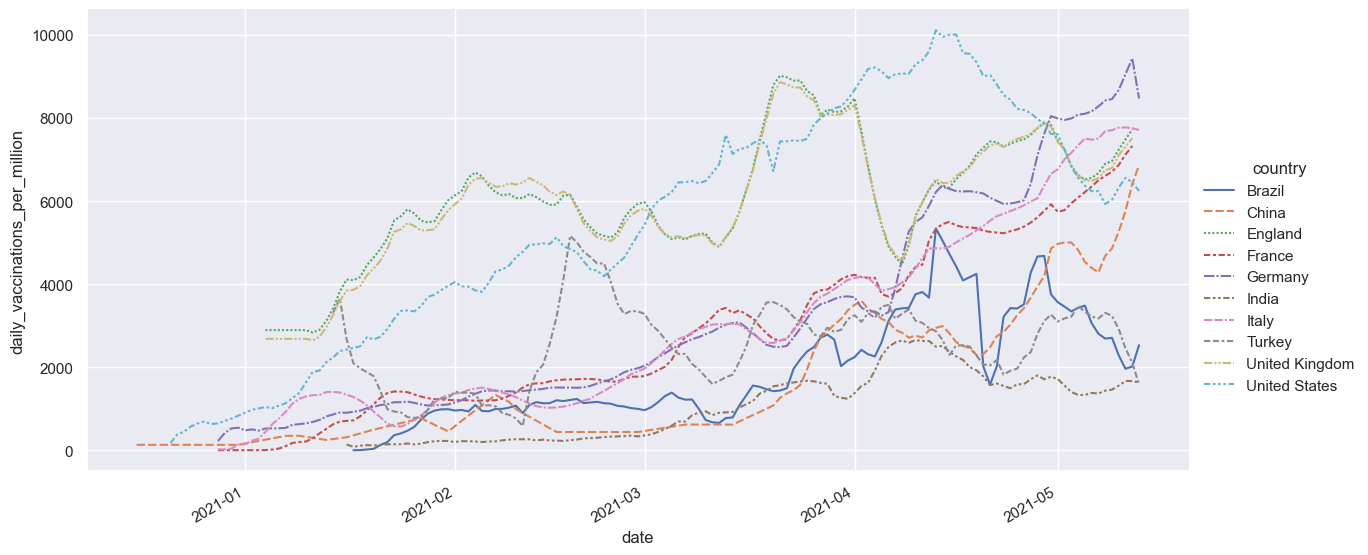

In [21]:
top_10 = cv_df_grp.sort_values(by=['total_vaccinations'],ascending=False).head(10)
top_country_grp = cv_df[cv_df['country'].isin(top_10['country'])]
top_country_pt = top_country_grp.pivot_table(index=['country','date'],values=['daily_vaccinations_per_million'],aggfunc=np.sum).reset_index()
sns.relplot(x="date", y="daily_vaccinations_per_million", hue='country', style='country', kind="line", height=6,aspect=2, data=top_country_grp).fig.autofmt_xdate()

In [22]:
def plot_3d(x,y,z):
    fig = plt.figure(figsize = (10,10))
    ax = plt.axes(projection='3d')
    ax.grid()
    ax.scatter(x, y, z, s = 50,alpha=0.6,edgecolor='w',c=z)
    ax.set_title('3D Scatter Plot')
    # Set axes label
    ax.set_xlabel('Year', labelpad=20)
    ax.set_ylabel('KM Driven', labelpad=20)
    ax.set_zlabel('Selling Price', labelpad=20)

In [23]:
def plot_cluster3d(x,y,z,pred):
    fig = plt.figure(figsize = (10,10))
    ax = plt.axes(projection='3d')
    ax.grid()
    ax.scatter(x, y, z, s = 50,alpha=0.6,edgecolor='w',c=pred)
    ax.set_title('3D K-Means Clustering Plot')
    # Set axes label
    ax.set_xlabel(x.name, labelpad=20)
    ax.set_ylabel(y.name, labelpad=20)
    ax.set_zlabel(z.name, labelpad=20)

In [24]:
# plot_3d(cdv_df.country,cdv_df.date,cdv_df.vaccines)

In [25]:
# Top_10_Country_Vaacinations=cv_df.pivot(index='date',columns='country',values='total_vaccinations')
# Top10Country=cv_df[cv_df['date']=='2021-05-13'].nlargest(10,'total_vaccinations')['country'].tolist()
# Top10=Top_10_Country_Vaacinations[Top10Country].fillna(0)

In [26]:
# import bar_chart_race as bcr
# bcr.bar_chart_race(df=top_10,figsize=(6,5),title='Top 10 Country by Vaccinations')